1. Combining satellite and OpenStreetMap data

In [1]:
import geopandas as gpd
import osmnx as ox

In [2]:
import math

In [57]:
import math

def latLngToPoint(mapWidth, mapHeight, lat, lng):

    x = (lng + 180) * (mapWidth/360)
    y = ((1 - math.log(math.tan(lat * math.pi / 180) + 1 / math.cos(lat * math.pi / 180)) / math.pi) / 2) * mapHeight

    return(x, y)

def pointToLatLng(mapWidth, mapHeight, x, y):

    lng = x / mapWidth * 360 - 180

    n = math.pi - 2 * math.pi * y / mapHeight
    lat = (180 / math.pi * math. atan(0.5 * (math.exp(n) - math.exp(-n))))

    return(lat, lng)

def getImageBounds(mapWidth, mapHeight, xScale, yScale, lat, lng):

    centreX, centreY = latLngToPoint(mapWidth, mapHeight, lat, lng)

    southWestX = centreX - (mapWidth/2)/ xScale
    southWestY = centreY + (mapHeight/2)/ yScale
    SWlat, SWlng = pointToLatLng(mapWidth, mapHeight, southWestX, southWestY)

    northEastX = centreX + (mapWidth/2)/ xScale
    northEastY = centreY - (mapHeight/2)/ yScale
    NElat, NElng = pointToLatLng(mapWidth, mapHeight, northEastX, northEastY)

    return[SWlat, SWlng, NElat, NElng]

lat = 49.567
lng = 10.899
zoom = 18
picHeight = 500 
picWidth = 500

mapHeight = 256 
mapWidth = 256

xScale = math.pow(2, zoom) / (picWidth/mapWidth)
yScale = math.pow(2, zoom) / (picHeight/mapWidth)

corners = getImageBounds(mapWidth, mapHeight, xScale, yScale, lat, lng)
corners

[49.566130207647326, 10.897658895492583, 49.56786977685628, 10.900341104507476]

In [66]:
south = 49.566130207647326
east = 10.897658895492583
north = 49.56786977685628
west = 10.900341104507476

<Axes: >

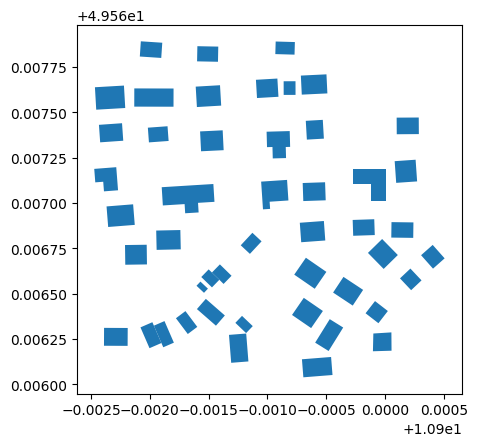

In [59]:
geo_information = ox.features_from_bbox(north,south,east,west, tags={'building':True})
geo_information.plot()

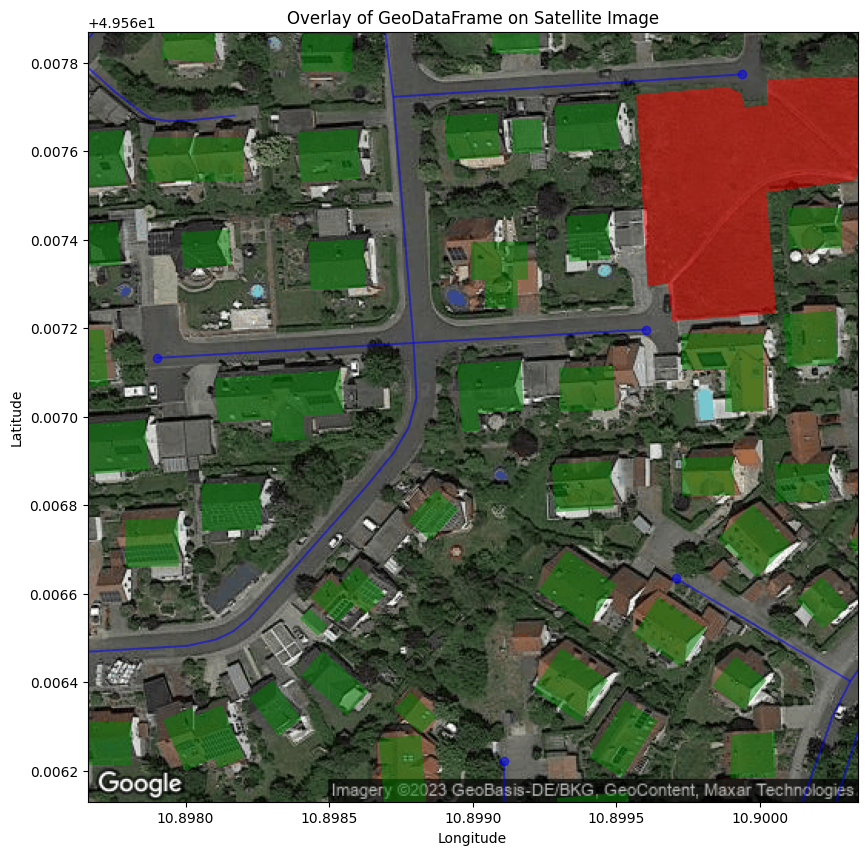

In [83]:
import geopandas as gpd
import matplotlib.pyplot as plt
from PIL import Image
import os

coordinates = (49.567, 10.899)

gdf = ox.features_from_bbox(north,south,east,west, tags={'landuse':"construction"})
buildings = ox.features_from_bbox(north,south,east,west, tags={'building':True})
highway = ox.features_from_bbox(north, south, east, west, tags={'highway': True})

satellite_image_path = os.getcwd() + os.sep + 'Data' + os.sep + str(coordinates[0]) + "_" + str(coordinates[1]) + ".png"
satellite_image = Image.open(satellite_image_path)

fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(satellite_image, extent=[east, west,  south, north])

gdf.plot(ax=ax, color='red', alpha=0.5) 
buildings.plot(ax=ax, color='green', alpha=0.5)
highway.plot(ax=ax, color='blue', alpha=0.5)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Overlay of GeoDataFrame on Satellite Image')
plt.xlim(east, west) 
plt.ylim(south, north)

plt.show()